## 监督学习
监督学习是机器学习任务中的一种,目的是构建这样一个函数,能够映射IO实例间的内在联系.输入通常是一个向量,当输出为连续值时为回归, 类别信息时则是分类.监督学习旨在推测输入在给定标签下的条件概率分布.
>特点

训练样本拥有明确的标记

>常见算法
- SVM
- 线性回归
 - 岭回归
 - lasso
 - 前向逐步回归
 - 局部加权线性回归
- 逻辑回归
- 朴素贝叶斯
- 线性判别分析
- 决策树
- 神经网络

## 无监督学习
无监督学习是种对输入概率密度建模的方法.无监督学习的主要应用在基于统计的概率密度估计.旨在推测输入先验概率分布.

>特点

训练样本无标签

>常见算法
- 聚类
 - 层次聚类
 - k-means
 - 混合模型
 - 密度聚类
   - DBSCAN
- 故障检测
 - Local Outlier Factor
- 神经网络
 - 自编码器
 - DBN
 - GAN 
- 隐变量模型
 - EM
 

## 泛化能力
举一反三的能力, 一个模型泛化能力强, 则该模型对未参与训练的数据预测,能得到很好的效果.



## 过拟合,欠拟合
### 过拟合
对训练数据学习程度过深, 将训练数据中一些特有的特征理解成了普遍特征.
> 特点

对训练数据拟合的十分完美, 在测试集上的效果却不如训练集上.
> 解决办法
- 降低模型复杂度
- 扩充训练样本
- 添加正则

### 欠拟合
模型学习能力不够,甚至连一些基本的特征也无法学习到

>特点

训练集与测试集效果都很差

>解决办法
- 增加模型复杂度
- 减少正则

## 交叉验证
### k折交叉验证
将数据集划分为k折, 每次选择其中k-1折训练,剩下的一折用来测试.
### 留一法
相当于是k折交叉验证取k为数据的个数, 在数据非常少的情况下可以用留一法.
### bootstrap
数据量极少的情况下使用, 有放回的随机抽取数据集中的一个样本至次数达到样本数, 没有取到过的留做测试

## 线性回归
线性回归是一种对自变量与因变量间关系建模的方法;当因变量为多个时为多元线性回归.
### 损失函数,代价函数, 目标函数
线性回归通常都是用最最小二乘法来实现.
$L=(Y-W^TX)^2$

损失函数与代价函数差不多,区别在于整体提与单个, 用于衡量预测结果与真实结果间的距离,
目标函数则是优化的目标, 在损失的基础上,往往还会有约束项.


### 优化方法
#### 梯度下降
梯度$\nabla L=(Y-W^TX)X$

$W=W-\alpha \nabla L$
#### Normal equation
$W=(X^TX)^{-1}X^TY$

对凸函数,能一步到达最优
当数据量大时求解拟矩阵的成本过高,
适合数据量不大的情况
#### 牛顿法
牛顿法为二阶,收敛比梯度下降要快得多,但海森矩阵的求解成本很高

$W=W-\alpha \frac{\nabla L}{\nabla^2L}$

#### 拟牛顿法
- DFP

$S_{k+1} = S_k + \frac{\delta_k \delta^T}{\delta^T \gamma_k} - \frac{S_k \gamma_k \gamma_k^T S_k}{\gamma_k^T S_k\gamma_k}$
- BFGS

$S_{k+1} = S_k + (1+\frac{\gamma_k^TS_k\gamma_k}{\gamma_k^T\delta_k})\frac{\delta_k \delta_k^T}{\gamma_k^T\delta_k}-\frac{\delta_k\gamma_k^TS_k+S_k\gamma_k\delta_k^T}{\gamma_k^T\delta_k}$
- L-BFGS

空间复杂度比BFGS低

### 评估指标
评估线性回归模型的好坏,通常用均方误差,均方根误差,平均绝对误差等

$MSE=(Y-\hat{Y})^2$

$RMSE=\sqrt{MSE}$

$MAE=\|{Y-\hat{Y}}\|$



### Sklearn

In [9]:
import numpy as np
np.random.seed(1111)
noise = np.random.randint(-3, 3,size=(20,)) + np.random.rand(20)

In [10]:
x = np.array(range(20))

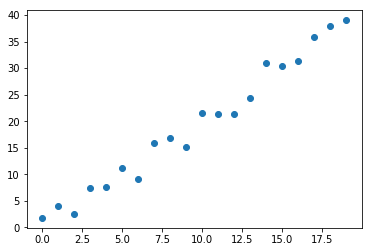

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x, 2*x+noise);

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x.reshape(-1,1), x*2+noise+1,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
lr.coef_

array([2.01497299])

In [14]:
lr.intercept_

1.1176300465227769

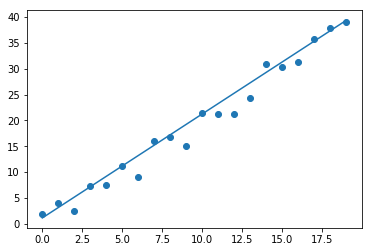

In [15]:
plt.scatter(x, x*2+noise);
plt.plot(x, lr.predict(x.reshape(-1, 1)));

## 概率解释
假定$y_i=\theta^Tx_i+\varepsilon_i,$   

$ \varepsilon_i泛指影响一切误差$  



假设$\forall \varepsilon \in \mathit{IID}$,根据中心极限定理, 误差分布会趋向高斯分布,$\forall \varepsilon \sim \mathcal N(0, \sigma^2)$
这样可以带来数学上的便利

在机器学习中, 所做的所有假设, 在绝对意义上都不是完全正确的.

概率密度函数$P(\varepsilon)=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{\varepsilon^2}{2\sigma^2})$


同样在给定参数的情况下, 模型服从正太分布

$P(y|x;\theta)\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y-\theta^Tx)^2}{2\sigma^2})$

$这里采用频率学派的观点, 随机变量\theta是一个具体的值,用;隔开, 只是无法直接观测到$, 


似然函数$$\mathcal L(\theta) = P(\vec{y}|X;\theta)\\= \prod_{i=1}^{m}P(y_i|x_i;\theta)\\=\prod_{i=1}^{m}\frac{1}
{\sqrt{2\pi\sigma}}exp(-\frac{y_i-\theta^Tx_i)^2}{2\sigma^2})$$

取对数似然进行化简就得到了最小二乘的形式
 